In [1]:
# !pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [5]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.8492]), tensor(-0.0236)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 2.327272
Ошибка после 1 итераций: 0.626970
Ошибка после 2 итераций: 0.340862
Ошибка после 3 итераций: 0.262719
Ошибка после 4 итераций: 0.225673
Ошибка после 5 итераций: 0.203845
Ошибка после 6 итераций: 0.189983
Ошибка после 7 итераций: 0.180147
Ошибка после 8 итераций: 0.172344
Ошибка после 9 итераций: 0.165343
Ошибка после 10 итераций: 0.162715
Ошибка после 11 итераций: 0.159078
Ошибка после 12 итераций: 0.155021
Ошибка после 13 итераций: 0.152821
Ошибка после 14 итераций: 0.152160
Ошибка после 15 итераций: 0.147938
Ошибка после 16 итераций: 0.147006
Ошибка после 17 итераций: 0.146597
Ошибка после 18 итераций: 0.143913
Ошибка после 19 итераций: 0.141593


In [7]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

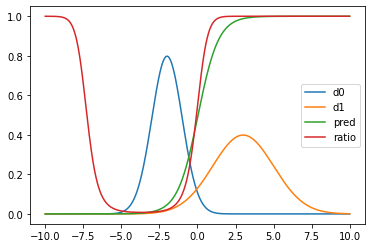

In [8]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4856]), tensor(-0.0571)]


In [10]:
torch.log(F.sigmoid(torch.tensor(-100.)))

/mnt/develop/_DS_/_env_/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [11]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)